# 1. Import Libraries

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Activation, ZeroPadding2D, LeakyReLU, ReLU, UpSampling2D, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

# 2. Load Data

In [2]:
df_original = pd.read_csv('emnist-letters-train.csv', header=None)
df_original

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99035,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99036,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99037,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99038,-1,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174


In [3]:
alphabets = df_original.iloc[:, 0]
alphabets

0        23
1         7
2        16
3        15
4        23
         ..
99035    18
99036    24
99037    19
99038    -1
99039    -1
Name: 0, Length: 99040, dtype: int64

In [4]:
df = df_original.drop(0, axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99038,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174


In [5]:
df_a = df_original[df_original.iloc[:, 0] == 1].drop(0, axis=1)
df_a

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_without_blank = df_original[df_original.iloc[:, 0] != -1].drop(0, axis=1)
df_without_blank

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Data Preprocessing

In [7]:
def createMatrix(df):
    arr = []

    for row in range(len(df)):
        img = df.iloc[row, :].values.reshape((28, 28))
        arr.append(np.transpose(img))

    arr = np.array(arr)
    print(arr.shape)

    return arr

In [8]:
imageArr = createMatrix(df)

(99040, 28, 28)


In [9]:
aArr = createMatrix(df_a)

(3396, 28, 28)


In [10]:
withoutBlankArr = createMatrix(df_without_blank)

(88800, 28, 28)


# 3. EDA

In [11]:
print(f'Highest pixel value: {np.max(withoutBlankArr)}')
print(f'Lowest pixel value: {np.min(withoutBlankArr)}')

Highest pixel value: 255
Lowest pixel value: 0


In [12]:
def plot_image(img):
    plt.imshow(img, cmap='gray')
    plt.show()

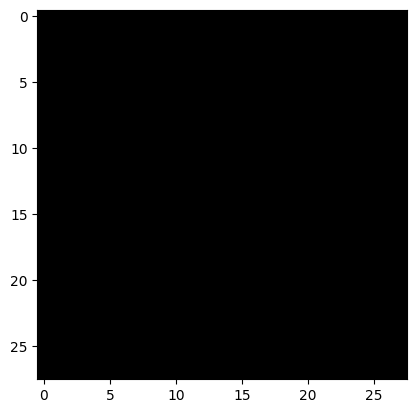

In [13]:
plot_image(imageArr[20])

In [14]:
def imageSubplot(arr, numberOfImages):
    plt.figure()

    for i in range(numberOfImages):
        plt.subplot(numberOfImages // 3, 3, i+1)  
        plt.imshow(arr[i], cmap='gray')
        plt.axis('off')  

    plt.tight_layout()  
    plt.show()

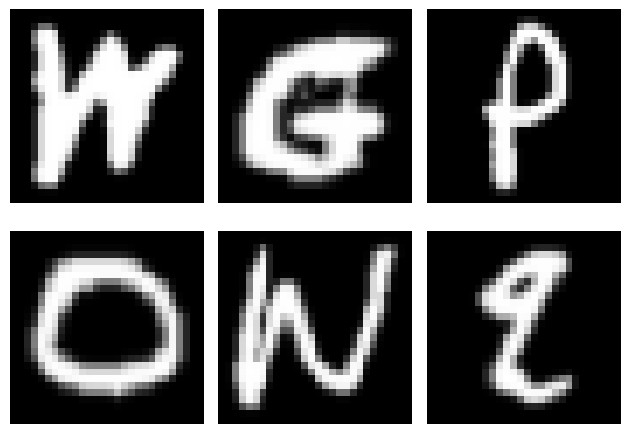

In [15]:
imageSubplot(imageArr, 6)

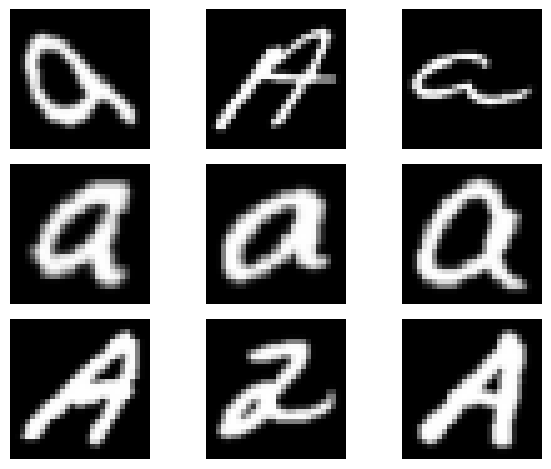

In [16]:
imageSubplot(aArr, 9)

In [17]:
np.sort(alphabets.unique())

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [18]:
len(alphabets.unique())

27

In [19]:
labels, counts = np.unique(alphabets, return_counts=True)
for label, count in zip(labels, counts):
    print(f'{label}: {count}')

-1: 10240
1: 3396
2: 3396
3: 3419
4: 3398
5: 3437
6: 3394
7: 3385
8: 3424
9: 3428
10: 3402
11: 3438
12: 3415
13: 3402
14: 3365
15: 3408
16: 3430
17: 3435
18: 3419
19: 3392
20: 3436
21: 3419
22: 3422
23: 3423
24: 3437
25: 3453
26: 3427


<Axes: xlabel='0', ylabel='count'>

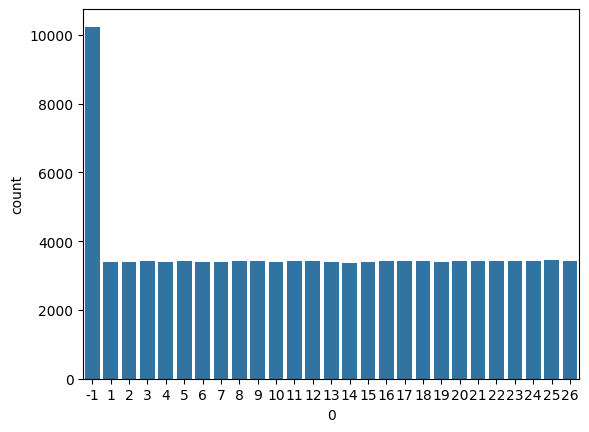

In [20]:
sns.countplot(x=alphabets)

<Axes: xlabel='0', ylabel='count'>

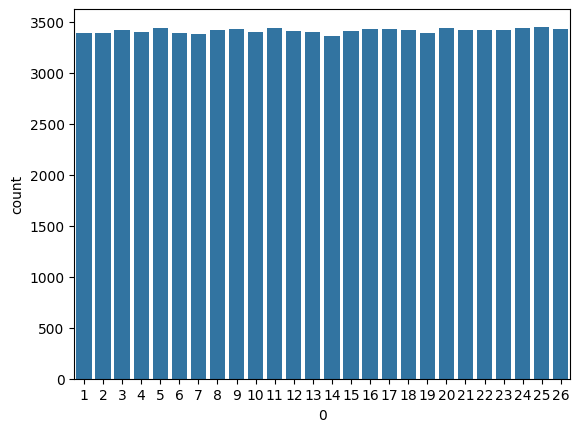

In [21]:
sns.countplot(x=alphabets[alphabets != -1])

# Model Training (With -1)

## Conv2DTranpose from Lab 5

In [ ]:
class DCGAN():
    
    # this is the function to build the generator neural network
    def build_generator(self):
        model = Sequential(name='Generator')
        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim)) # connect the input to dense layer
        model.add(Reshape((7, 7, 128)))
        # upsample from 7*7 to 14*14
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # upsample to 28x28
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(self.channels, kernel_size=7, padding="same", activation='sigmoid'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        return Model(noise, img)  # the keras Model class groups layers into an object with training and inference features
    
    def build_discriminator(self):
        model = Sequential(name='Discriminator')
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)

    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows  # generated image height
        self.img_cols = cols  # generated image width
        self.channels = channels  # generated image channel
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z  # the input is 1-D vector of noise
        # Reduce learning rate from 0.001 to 0.0002, and beta1 from 0.9 to 0.5, which can stablize training and reduce oscillation
        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
            optimizer=optimizer)
    
    def train(self, epochs, batch_size=128, save_interval=50):
        # Load the dataset
        X_train = np.array(imageArr)
        # Rescale 0 to 1
        X_train = X_train / 255
        X_train = np.expand_dims(X_train, axis=3)
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            # Train the discriminator (it classify real images as 1 and generated images as 0)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            # Train the generator (it wants discriminator to predict generated images as 1)
            g_loss = self.combined.train_on_batch(noise, valid)
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            
            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)
    
    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_mnist', exist_ok=True)
        fig.savefig("generated_mnist/dcgan_mnist_{:d}.png".format(epoch))
        plt.close()

In [ ]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=5000, batch_size=256, save_interval=50)

## Upsampling from Lab 5

In [ ]:
class DCGAN():
    def __init__(self, rows, cols, channels, z = 10):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z

        optimizer = Adam(0.0001, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=256, save_interval=50):

        # Load the dataset
        X_train = np.array(imageArr)

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("dcgan_mnist_{:d}.png".format(epoch))
        plt.close()


In [ ]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=5000, batch_size=256, save_interval=50)

## Editted Conv2DTranspose 

In [ ]:
class DCGAN():
    
    # this is the function to build the generator neural network
    def build_generator(self):
        model = Sequential(name='Generator')
        model.add(Dense(256 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 256)))
        model.add(BatchNormalization())

        model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())

        model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())

        model.add(Conv2D(self.channels, kernel_size=7, padding="same", activation='sigmoid'))
        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        return Model(noise, img)
        
    def build_discriminator(self):
        model = Sequential(name='Discriminator')

        model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))  # Adjust dropout rate

        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))  # Adjust dropout rate

        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)

    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows  # generated image height
        self.img_cols = cols  # generated image width
        self.channels = channels  # generated image channel
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z  # the input is 1-D vector of noise
        # Reduce learning rate from 0.001 to 0.0002, and beta1 from 0.9 to 0.5, which can stablize training and reduce oscillation
        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
            optimizer=optimizer)
    
    def train(self, epochs, batch_size=128, save_interval=50):
        # Load the dataset
        X_train = np.array(imageArr)
        # Rescale 0 to 1
        X_train = X_train / 255
        X_train = np.expand_dims(X_train, axis=3)
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            # Train the discriminator (it classify real images as 1 and generated images as 0)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            # Train the generator (it wants discriminator to predict generated images as 1)
            g_loss = self.combined.train_on_batch(noise, valid)
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            
            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)
    
    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_mnist', exist_ok=True)
        fig.savefig("generated_mnist/dcgan_mnist_{:d}.png".format(epoch))
        plt.close()

# Model Training (Without -1)

## machinelearningmastery

In [44]:
class DCGAN:
    def __init__(self, rows, cols, channels, z=100):
        # Input shape
        self.img_rows = rows  # generated image height
        self.img_cols = cols  # generated image width
        self.channels = channels  # generated image channel
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z  # the input is 1-D vector of noise
        # Reduce learning rate from 0.001 to 0.0002, and beta1 from 0.9 to 0.5, which can stabilize training and reduce oscillation
        disc_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        gen_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=disc_optimizer,
                                   metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
                              optimizer=gen_optimizer)

    def build_generator(self):
        model = Sequential(name='Generator')
        model.add(Dense(256 * 7 * 7, activation="relu", input_dim=self.latent_dim)) # connect the input to dense layer
        model.add(BatchNormalization())
        model.add(ReLU())
        model.add(Reshape((7, 7, 256)))
        # upsample from 7*7 to 14*14
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(BatchNormalization())
        model.add(ReLU())
        # upsample to 28x28
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(BatchNormalization())
        model.add(ReLU())
        model.add(Conv2D(self.channels, (3,3), padding="same", activation='tanh'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        return Model(noise, img)  # the keras Model class groups layers into an object with training and inference features
    
    def build_discriminator(self):
        model = Sequential(name='Discriminator')
        # normal
        model.add(Conv2D(128, (3,3), padding='same', input_shape=self.img_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        # downsample
        model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        # classifier
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):
        # scale to [-1, 1]
        X_train = withoutBlankArr / 127.5 - 1
        X_train = np.expand_dims(X_train, axis=3)
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        # Lists to store the losses
        d_losses = []
        g_losses = []

        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            # Train the discriminator (it classify real images as 1 and generated images as 0)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            d_losses.append(d_loss[0])  # Record the discriminator loss

            # ---------------------
            # Train Generator
            # ---------------------
            # Train the generator (it wants discriminator to predict generated images as 1)
            g_loss = self.combined.train_on_batch(noise, valid)
            g_losses.append(g_loss)  # Record the generator loss

            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

        # Plot loss curves
        self.plot_loss(d_losses, g_losses)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        os.makedirs('generated_mnist', exist_ok=True)
        fig.savefig("generated_mnist/dcgan_mnist_{:d}.png".format(epoch))
        plt.close()

    def plot_loss(self, d_losses, g_losses):
        plt.figure(figsize=(10, 5))
        plt.plot(d_losses, label='Discriminator Loss')
        plt.plot(g_losses, label='Generator Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss Curves')
        plt.legend()
        plt.show()

In [ ]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=5000, batch_size=256, save_interval=50)

## test

In [26]:
import numpy as np
from tensorflow.keras.layers import Dense, BatchNormalization, ReLU, Reshape, Conv2DTranspose, Conv2D, LeakyReLU, Dropout, Flatten, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import matplotlib.pyplot as plt
import os
from scipy.linalg import sqrtm
import tensorflow as tf

class DCGAN:
    def __init__(self, rows, cols, channels, z=100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        disc_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        gen_optimizer = Adam(learning_rate=0.0001, beta_1=0.5)
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=disc_optimizer,
                                   metrics=['accuracy'])
        self.generator = self.build_generator()
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        self.discriminator.trainable = False
        valid = self.discriminator(img)
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
                              optimizer=gen_optimizer)

    def build_generator(self):
        model = Sequential(name='Generator')
        model.add(Dense(7*7*256, use_bias=False, input_dim=self.latent_dim))
        model.add(BatchNormalization())
        model.add(ReLU())
        model.add(Reshape((7, 7, 256)))

        model.add(Conv2DTranspose(128, (1, 1), strides=(2, 2), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(ReLU())

        model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(ReLU())

        model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(ReLU())

        model.add(Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(ReLU())

        model.add(Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential(name='Discriminator')
        model.add(Conv2D(64, kernel_size=3, strides=5, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)

    def preprocess_for_inception(self, images):
        images_rgb = []
        for img in images:
            # Convert grayscale to RGB by repeating the single channel three times
            img_rgb = np.repeat(img, 3, axis=-1)
            img_resized = tf.image.resize(img_rgb, (299, 299))
            img_resized = img_to_array(img_resized)
            images_rgb.append(img_resized)
        images_rgb = np.array(images_rgb)
        return preprocess_input(images_rgb)

    def calculate_fid(self, model, real_images, generated_images):
        # Resize images to (299, 299) and convert grayscale to RGB
        real_images_resized = self.preprocess_for_inception(real_images)
        generated_images_resized = self.preprocess_for_inception(generated_images)
        # Get the activations from the InceptionV3 model
        act_real = model.predict(real_images_resized)
        act_gen = model.predict(generated_images_resized)
        # Calculate the mean and covariance of the activations
        mu_real, sigma_real = act_real.mean(axis=0), np.cov(act_real, rowvar=False)
        mu_gen, sigma_gen = act_gen.mean(axis=0), np.cov(act_gen, rowvar=False)
        # Calculate the sum of squared differences between means
        ssdiff = np.sum((mu_real - mu_gen) ** 2.0)
        # Calculate the square root of the product of the covariances
        covmean = sqrtm(sigma_real.dot(sigma_gen))
        # Handle imaginary numbers
        if np.iscomplexobj(covmean):
            covmean = covmean.real
        # Calculate the FID score
        fid = ssdiff + np.trace(sigma_real + sigma_gen - 2.0 * covmean)
        return fid

    def train(self, epochs, batch_size=128, save_interval=50):
        inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

        # scale to [-1, 1]
        X_train = (withoutBlankArr - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        # Lists to store the losses and FID scores
        d_losses = []
        g_losses = []
        fid_scores = []

        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            # Train the discriminator (it classify real images as 1 and generated images as 0)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            d_losses.append(d_loss[0])  # Record the discriminator loss

            # ---------------------
            # Train Generator
            # ---------------------
            # Train the generator (it wants discriminator to predict generated images as 1)
            g_loss = self.combined.train_on_batch(noise, valid)
            g_losses.append(g_loss)  # Record the generator loss

            # Calculate FID score at intervals
            if epoch % save_interval == 0:
                fid = self.calculate_fid(inception_model, imgs, gen_imgs)
                fid_scores.append(fid)
                print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss}] [FID: {fid}]")
                self.save_imgs(epoch)

        # Plot loss curves and FID scores
        self.plot_loss(d_losses, g_losses, fid_scores)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        if not os.path.exists('images'):
            os.makedirs('images')
        fig.savefig(f"images/mnist_{epoch}.png")
        plt.close()

    def plot_loss(self, d_losses, g_losses, fid_scores):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(d_losses, label="Discriminator loss")
        plt.plot(g_losses, label="Generator loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot([i*50 for i in range(len(fid_scores))], fid_scores, label="FID score")
        plt.xlabel("Epoch")
        plt.ylabel("FID score")
        plt.legend()

        if not os.path.exists('plots'):
            os.makedirs('plots')
        plt.savefig("plots/loss_fid.png")
        plt.show()

# Ensure your training dataset withoutBlankArr is properly loaded here

dcgan = DCGAN(28, 28, 1)
dcgan.train(epochs=10001, batch_size=256, save_interval=50)

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_388 (Conv2D)         (None, 6, 6, 64)          640       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 6, 6, 64)          0         
                                                                 
 dropout_12 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 conv2d_389 (Conv2D)         (None, 3, 3, 128)         73856     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 3, 3, 128)         0         
                                                                 
 dropout_13 (Dropout)        (None, 3, 3, 128)         0         
                                                                 
 conv2d_390 (Conv2D)         (None, 2, 2, 128)       

KeyboardInterrupt: 